In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [167]:
import random
from numpy.random import seed
random.seed(36)
seed(36)
tf.random.set_seed(36)
np.random.seed(36)
import os
os.environ['PYTHONHASHSEED'] = '0'
tf.keras.utils.set_random_seed(36)
tf.config.experimental.enable_op_determinism()

In [168]:
import warnings
warnings.filterwarnings("ignore")

In [169]:
data = pd.read_csv('Invistico_Airline.csv')
print(data.shape)
data.head(3)

(129880, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0


In [170]:
data = data[:int(len(data)*0.02)]
data.shape

(2597, 23)

In [171]:
data['satisfaction'].value_counts()

satisfied       1649
dissatisfied     948
Name: satisfaction, dtype: int64

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       2597 non-null   object 
 1   Gender                             2597 non-null   object 
 2   Customer Type                      2597 non-null   object 
 3   Age                                2597 non-null   int64  
 4   Type of Travel                     2597 non-null   object 
 5   Class                              2597 non-null   object 
 6   Flight Distance                    2597 non-null   int64  
 7   Seat comfort                       2597 non-null   int64  
 8   Departure/Arrival time convenient  2597 non-null   int64  
 9   Food and drink                     2597 non-null   int64  
 10  Gate location                      2597 non-null   int64  
 11  Inflight wifi service              2597 non-null   int64

In [173]:
print(data.isnull().sum())

satisfaction                          0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             15
dtype: int64


In [174]:
data.dropna(inplace=True)

In [175]:
data_obj = data.select_dtypes(include=["object"])
data_obj

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco
...,...,...,...,...,...
2592,satisfied,Female,Loyal Customer,Personal Travel,Eco
2593,dissatisfied,Male,Loyal Customer,Personal Travel,Eco
2594,dissatisfied,Male,Loyal Customer,Personal Travel,Eco
2595,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [176]:
data.drop(['Gender','Customer Type','Type of Travel','Class'], axis=1,inplace=True)

In [177]:
print(data.shape)
data.head(1)

(2582, 19)


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [178]:
# satisfied = 1, dissatisfied = 0
lable_encoder = LabelEncoder()
data['satisfaction'] = lable_encoder.fit_transform(data['satisfaction'])

In [179]:
data.head(3)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0


In [180]:
df = data.drop(['satisfaction'], axis=1)
df.shape

(2582, 18)

### K-means

In [181]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

In [182]:
def silhouette_kmeans_plot(X, K, Model):
    score_list = []
    inertia_list = []
    time_list = []
    K = range(2, K+1)
    for k in K:
        start = time.time()
        model= Model(k, random_state=36)
        model.fit(X.values)
        inertia_list.append(model.inertia_)
        score = silhouette_score(X, model.labels_)
        score_list.append(score)
        end = time.time()
        time_list.append(end-start)
        # print('K =', k, 'Silhouette Score =', score, 'Inertia =', model.inertia_, 'Time =', end-start)
    fig, ax = plt.subplots(1, 3, figsize=(24, 6))
    ax[0].plot(K, score_list, 'bo-')
    ax[0].set_xlabel('Number of Clusters (k)')
    ax[0].set_ylabel('Silhouette Score')
    ax[0].set_title('Silhouette Score vs. Number of Clusters')
    ax[0].set_xticks(np.arange(2, K[-1]+1, 2))
    ax[1].plot(K, inertia_list, 'ro-')
    ax[1].set_ylabel('Inertia')
    ax[1].set_xlabel('Number of Clusters (k)')
    ax[1].set_xticks(np.arange(2, K[-1]+1, 2))
    ax[1].set_title('Silhouette Inertia vs. Number of Clusters')
    ax[2].plot(K, time_list, 'go-')
    ax[2].set_ylabel('Time')
    ax[2].set_xlabel('Number of Clusters (k)')
    ax[2].set_xticks(np.arange(2, K[-1]+1, 2))
    ax[2].set_title('Silhouette Time vs. Number of Clusters')
    plt.show()


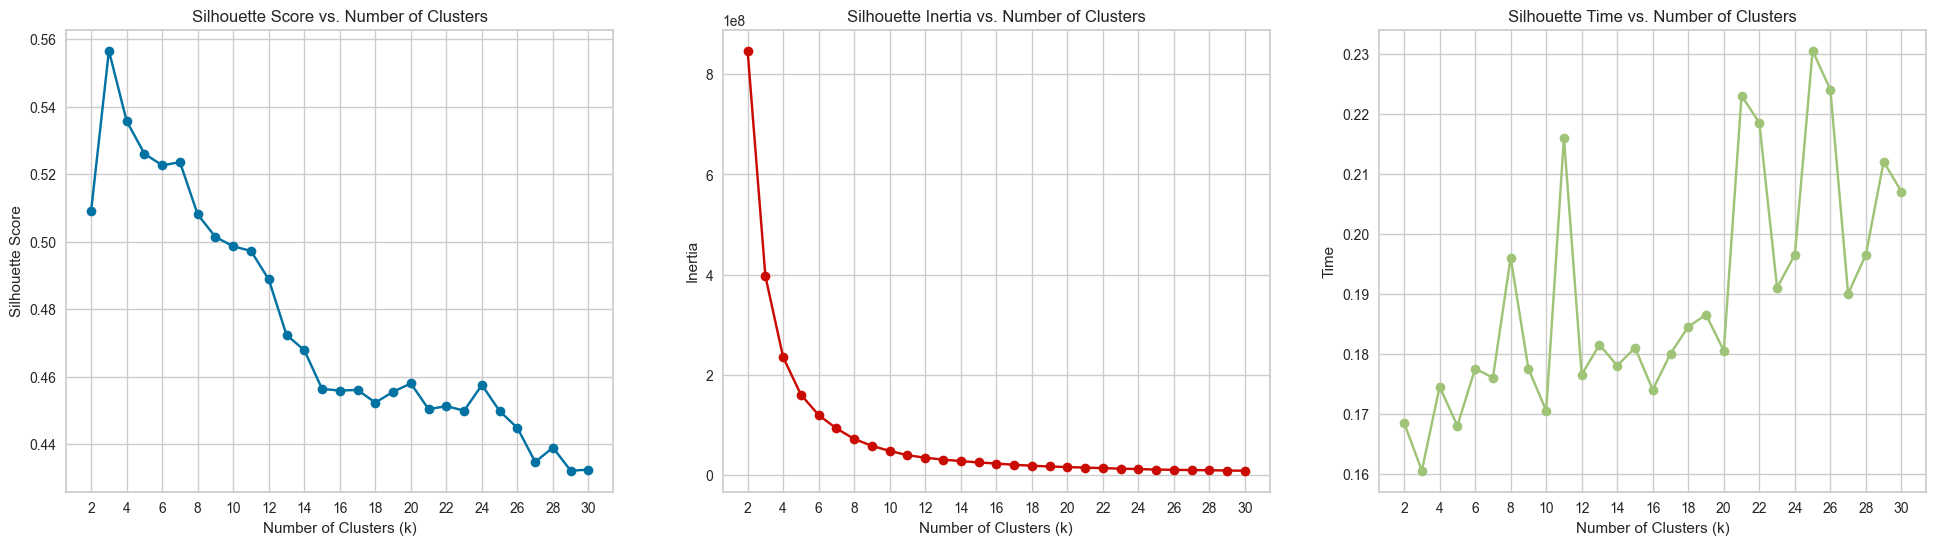

In [183]:
silhouette_kmeans_plot(df, 30, KMeans)

In [184]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

In [185]:
def SV_ICD_plots(X, K, Model):
    plot_nums = len(K)
    fig, axes = plt.subplots(plot_nums, 2, figsize=[25, 40])
    row = 0
    for k in K:
        kmeans = Model(n_clusters=k, random_state=36)
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axes[row][0])
        visualizer.fit(X.values)
        visualizer.finalize()
        
        kmeans = Model(n_clusters=k, random_state=36)
        visualizer = InterclusterDistance(kmeans, ax=axes[row][1])
        visualizer.fit(X)
        visualizer.finalize()
        
        row+=1
    plt.show()

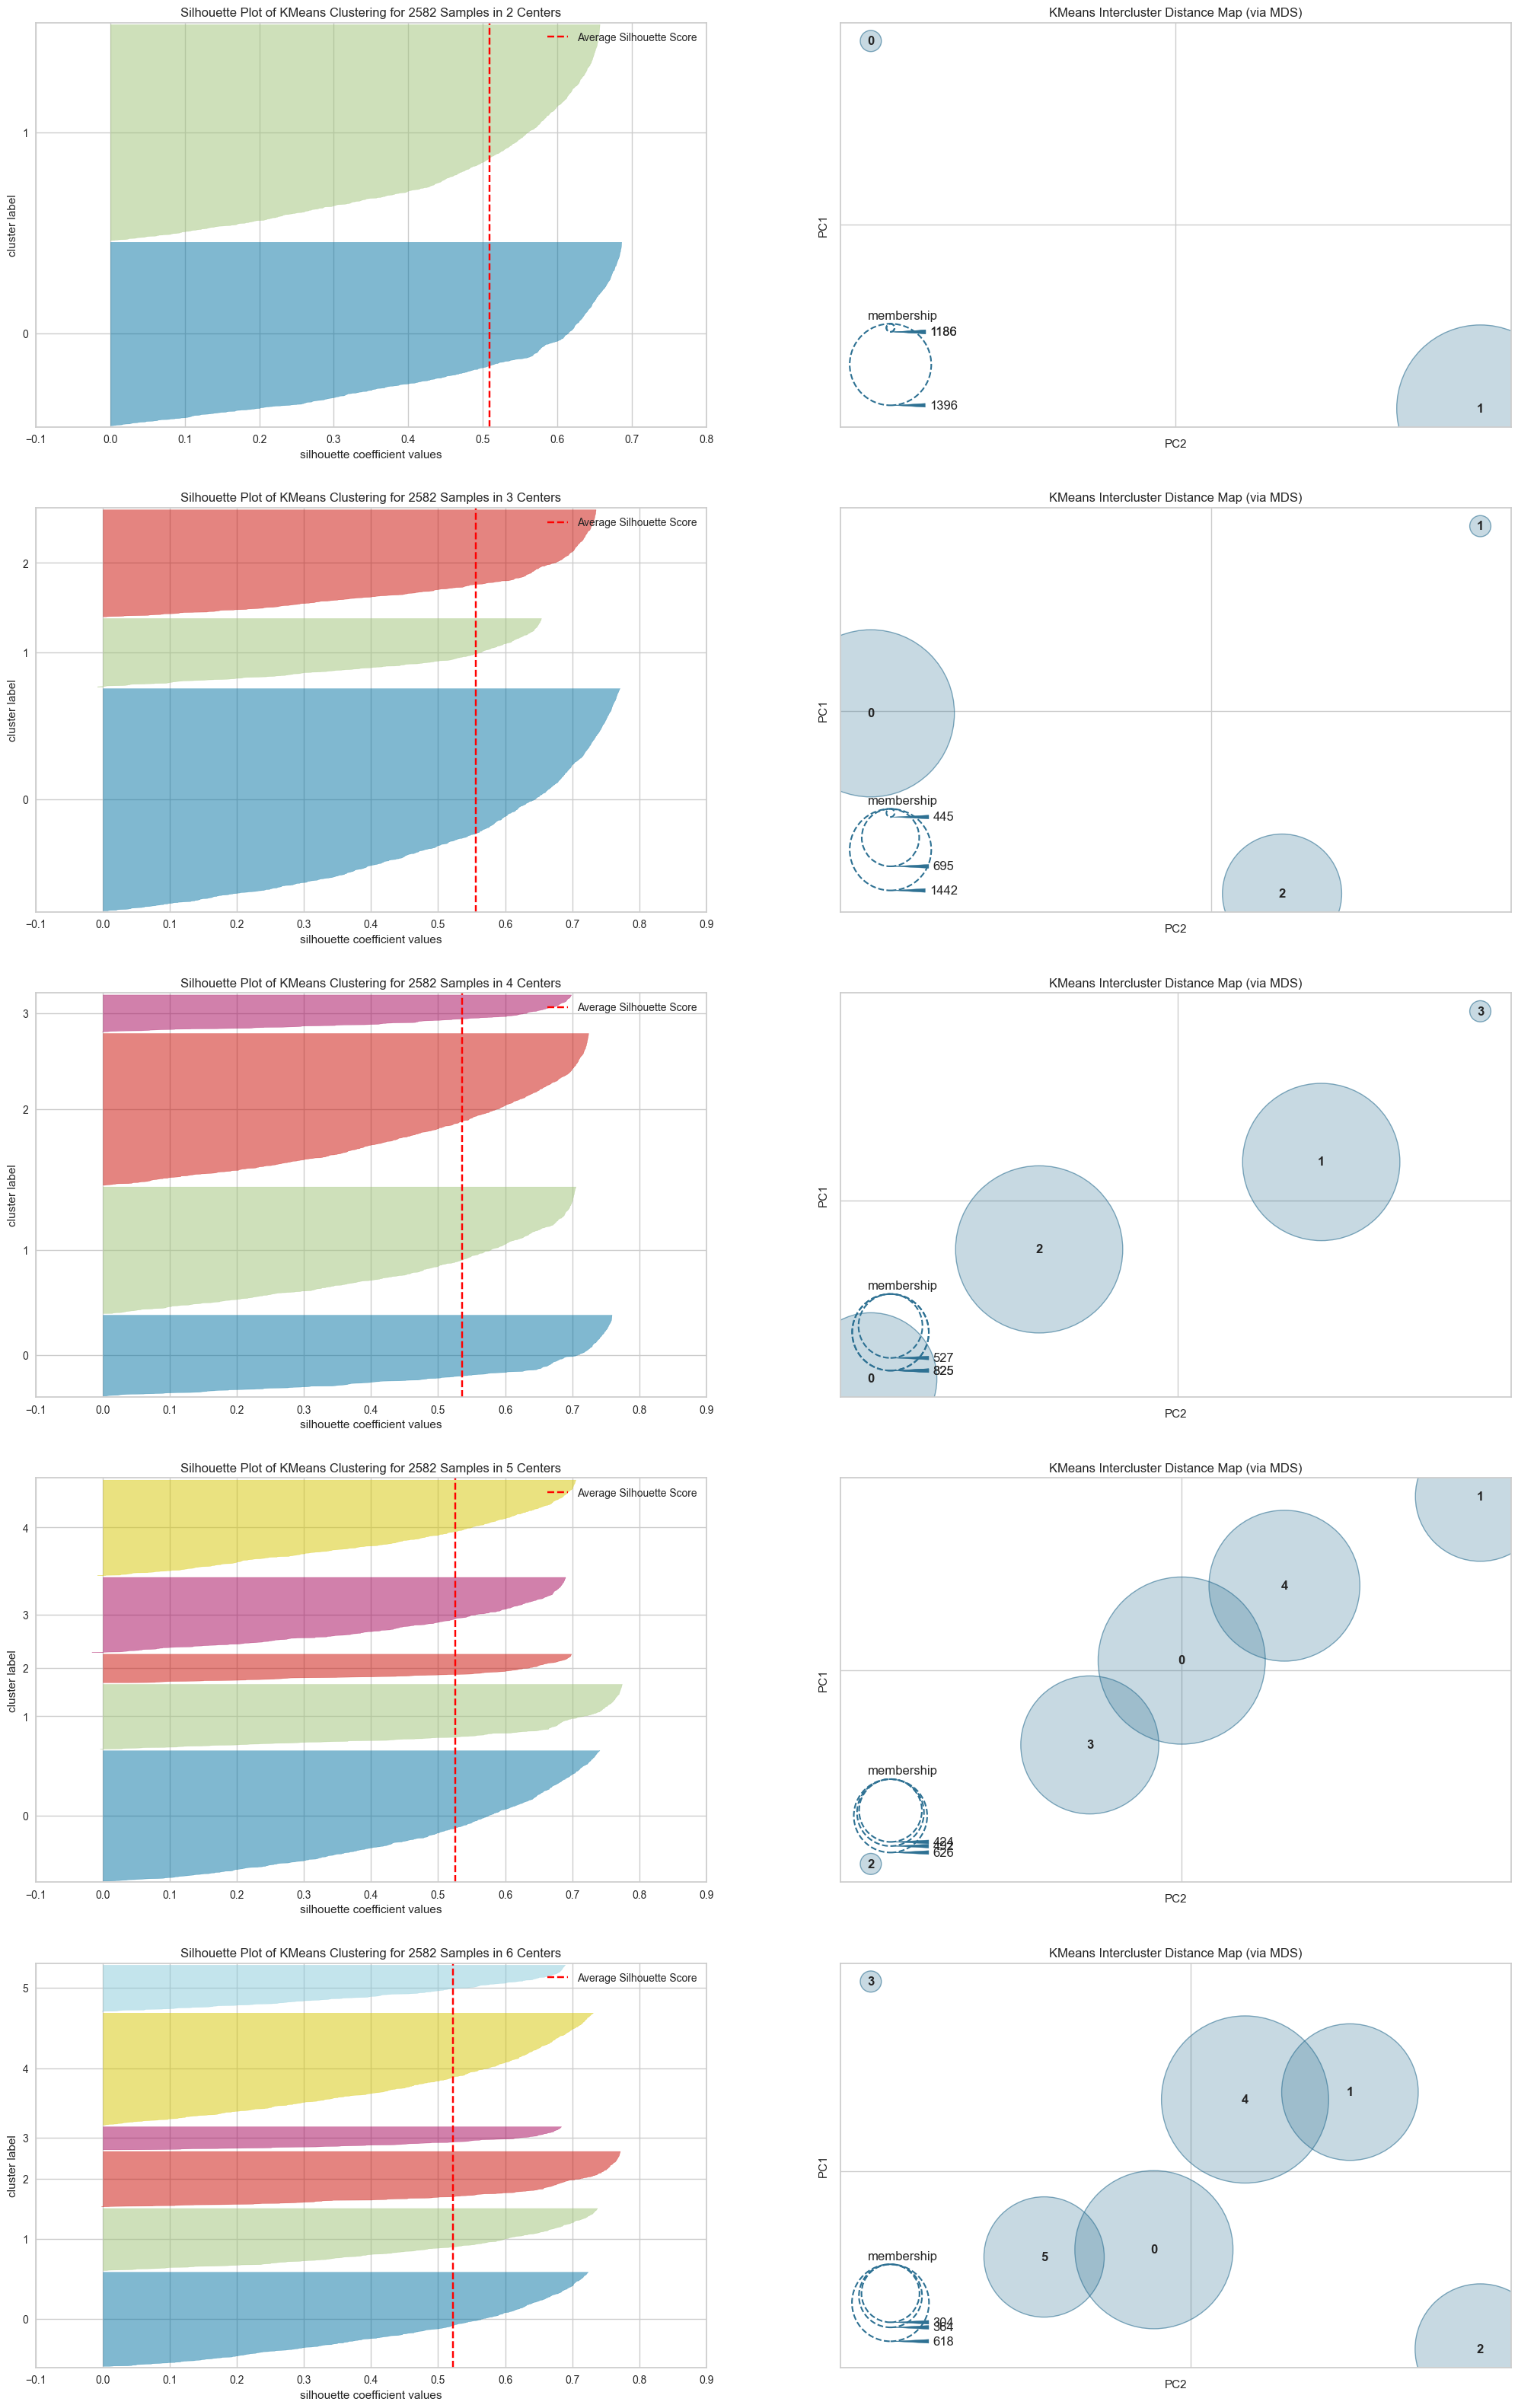

In [186]:
K = [2, 3, 4, 5, 6]
SV_ICD_plots(df, K, KMeans)

### Expected Maximization (GMM)

In [187]:
from sklearn.mixture import GaussianMixture

In [188]:
def silhouette_gmm_plot(X, K, Model):
    score_list = []
    time_list = []
    K = range(2, K+1)
    for k in K:
        start = time.time()
        model= Model(k, random_state=36, n_init=9)
        model.fit(X.values)
        score = silhouette_score(X, model.predict(X.values))
        score_list.append(score)
        end = time.time()
        time_list.append(end-start)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(K, score_list, 'bo-')
    ax[0].set_xlabel('Number of Clusters (k)')
    ax[0].set_ylabel('Silhouette Score')
    ax[0].set_title('Silhouette Score vs. Number of Clusters')
    ax[0].set_xticks(np.arange(2, K[-1]+1, 2))
    ax[1].plot(K, time_list, 'ro-')
    ax[1].set_ylabel('Time')
    ax[1].set_xlabel('Number of Clusters (k)')
    ax[1].set_xticks(np.arange(2, K[-1]+1, 2))
    ax[1].set_title('Silhouette Time vs. Number of Clusters')
    plt.show()

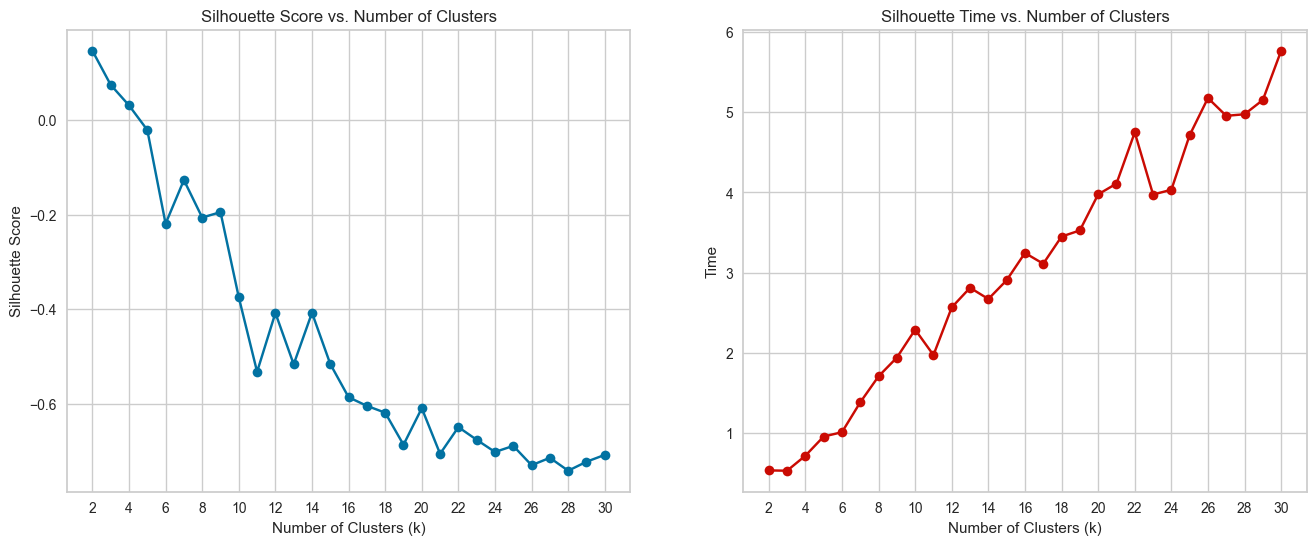

In [189]:
silhouette_gmm_plot(df, 30, GaussianMixture)

In [190]:
def aic_bic_plot(X, K, Model):
    aic = []
    bic = []
    time_list = []
    K = range(2, K+1)
    for k in K:
        start = time.time()
        gmm = Model(n_components=k, random_state=36, n_init=9).fit(X.to_numpy())
        end = time.time()
        time_list.append(end-start)
        aic.append(gmm.aic(X.to_numpy()))
        bic.append(gmm.bic(X.to_numpy()))
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(K, aic, 'bo-', label='AIC')
    ax.plot(K, bic, 'ro-', label='BIC')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('AIC/BIC')
    ax.set_title('AIC/BIC vs. Number of Clusters')
    ax.set_xticks(np.arange(2, K[-1]+1, 2))
    ax.legend()
    plt.show()


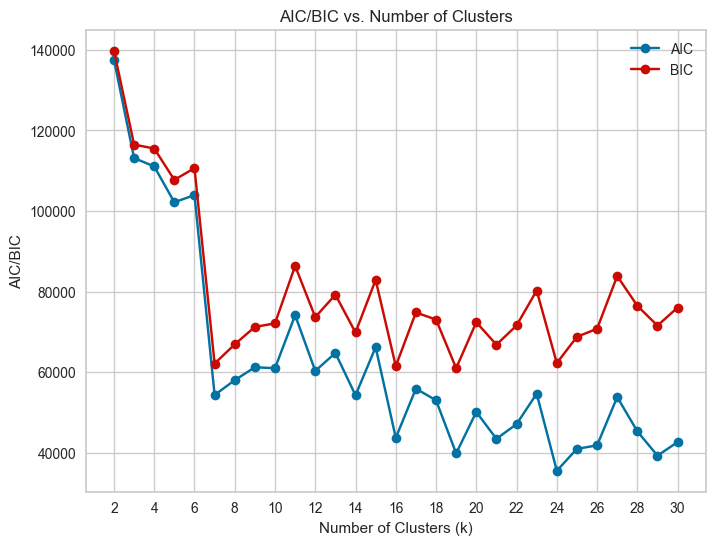

In [191]:
aic_bic_plot(df, 30, GaussianMixture)

### PCA

In [192]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

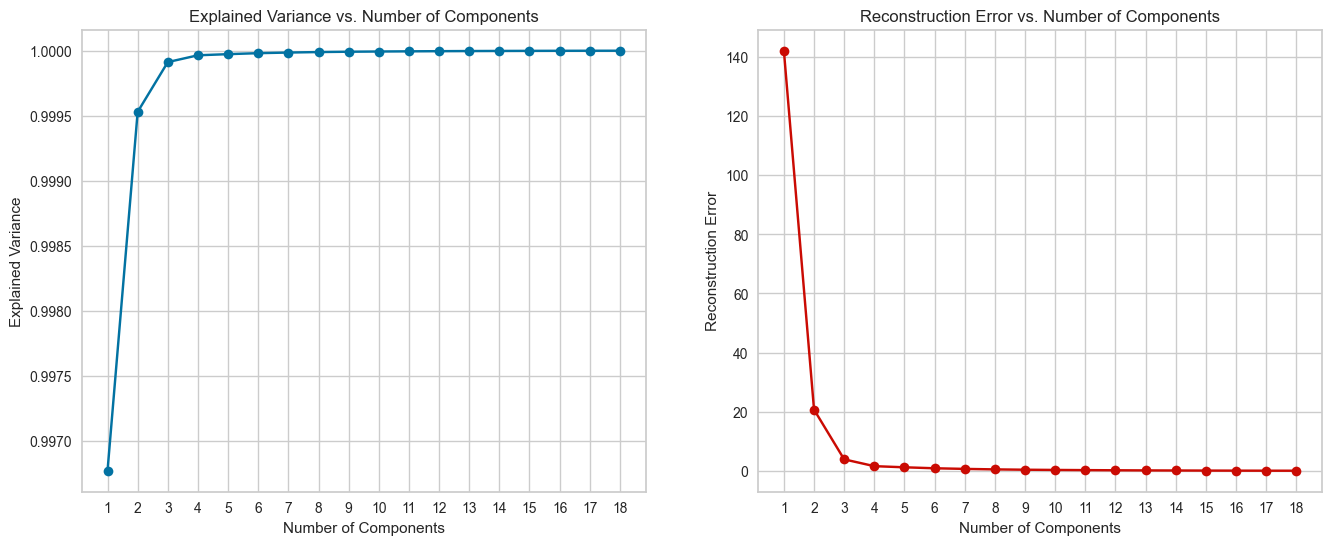

In [193]:
variance_pca = []
error_pca = []
for i in range(1, len(df.columns)+1):
    pca = PCA(n_components=i, random_state=36)
    pca.fit(df.to_numpy())
    variance_pca.append(np.sum(pca.explained_variance_ratio_))
    
    X_reduced = pca.transform(df.to_numpy())
    X_project = pca.inverse_transform(X_reduced)
    error_pca.append(mean_squared_error(df.values, X_project))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(range(1, len(df.columns)+1), variance_pca, 'bo-')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Explained Variance')
ax[0].set_title('Explained Variance vs. Number of Components')
ax[0].set_xticks(np.arange(1, len(df.columns)+1, 1))
ax[1].plot(range(1, len(df.columns)+1), error_pca, 'ro-')
ax[1].set_ylabel('Reconstruction Error')
ax[1].set_xlabel('Number of Components')
ax[1].set_title('Reconstruction Error vs. Number of Components')
ax[1].set_xticks(np.arange(1, len(df.columns)+1, 1))
plt.show()


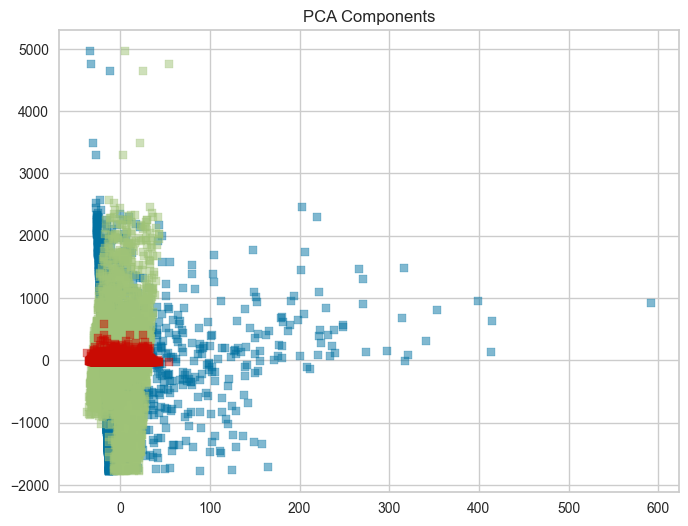

In [194]:
i = 3
pca = PCA(n_components=i)
X_reduced = pca.fit_transform(df.to_numpy())

plt.figure(figsize=(8,6))
plt.title('PCA Components')

for i in range(0, i):
    for j in range(0, i):
        if i == j:
            continue
        plt.scatter(X_reduced[:,i], X_reduced[:,j], marker='s', s=30, alpha=0.5)


### ICA

In [195]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

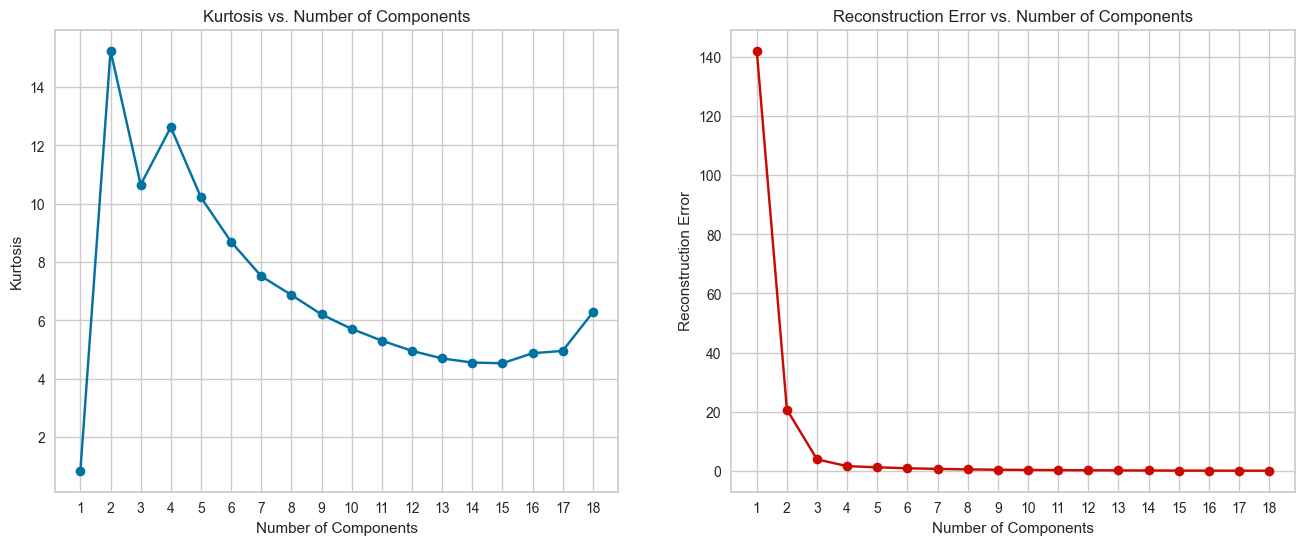

In [196]:
kur_arr = []
error_ica = []
for i in range(1, len(df.columns)+1):
    ica = FastICA(n_components=i, random_state=36, max_iter=600)
    ica.fit(df.to_numpy())
    
    X_reduced = ica.transform(df.to_numpy())
    kur_arr.append(np.mean(np.abs(kurtosis(X_reduced))))
    
    X_project = ica.inverse_transform(X_reduced)
    error_ica.append(mean_squared_error(df.values,  X_project))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(range(1, len(df.columns)+1), kur_arr, 'bo-')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Kurtosis')
ax[0].set_title('Kurtosis vs. Number of Components')
ax[0].set_xticks(np.arange(1, len(df.columns)+1, 1))
ax[1].plot(range(1, len(df.columns)+1), error_ica, 'ro-')
ax[1].set_ylabel('Reconstruction Error')
ax[1].set_xlabel('Number of Components')
ax[1].set_title('Reconstruction Error vs. Number of Components')
ax[1].set_xticks(np.arange(1, len(df.columns)+1, 1))
plt.show()

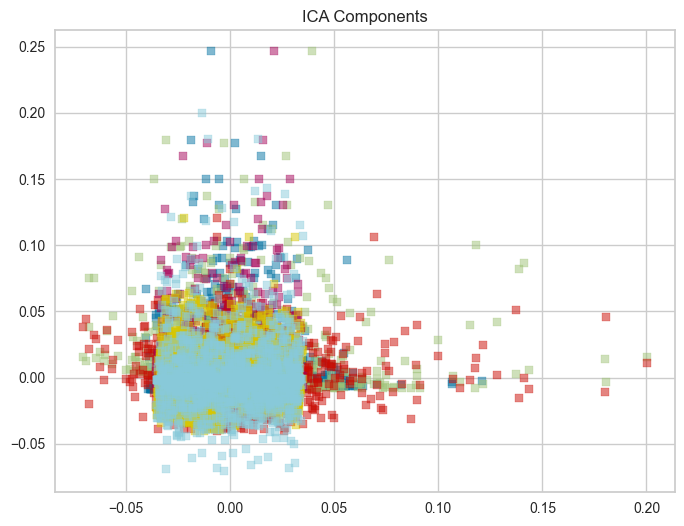

In [221]:
i = 4
ica = FastICA(n_components=i, max_iter=600, random_state=36) 
X_reduced=ica.fit_transform(df.to_numpy())

plt.figure(figsize=(8,6))
plt.title('ICA Components')

for i in range(0, i):
    for j in range(0, i):
        if i == j:
            continue
        plt.scatter(X_reduced[:,i], X_reduced[:,j], marker='s', s=30, alpha=0.5)

### Randomized Projections (RP)

In [198]:
from sklearn import random_projection
from sklearn.metrics import mean_squared_error
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection

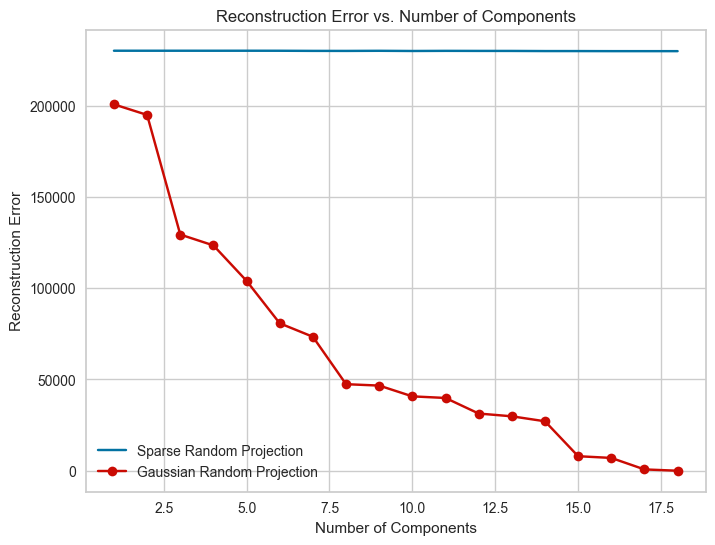

In [199]:
error_RP_SRR = []
for i in range(1, len(df.columns)+1):
    rand_proj = SparseRandomProjection(n_components=i, compute_inverse_components=True, random_state=36)
    rand_proj.fit(df.to_numpy())
    X_reduced = rand_proj.transform(df.values)   
    X_recon = rand_proj.inverse_transform(X_reduced)
    error_RP_SRR.append(mean_squared_error(df.to_numpy(), X_recon))

error_RP_GRR = []
for i in range(1, len(df.columns)+1):
    rand_proj = GaussianRandomProjection(n_components=i, compute_inverse_components=True, random_state=36)
    rand_proj.fit(df.to_numpy())
    X_reduced = rand_proj.transform(df.values)   
    X_recon = rand_proj.inverse_transform(X_reduced)
    error_RP_GRR.append(mean_squared_error(df.to_numpy(), X_recon))

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns)+1), error_RP_SRR, 'bx-', label='Sparse Random Projection')
plt.plot(range(1, len(df.columns)+1), error_RP_GRR, 'ro-', label='Gaussian Random Projection')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components')
plt.legend()
plt.show()

### Dictionary Learning (DL)

In [200]:
from sklearn.decomposition import DictionaryLearning

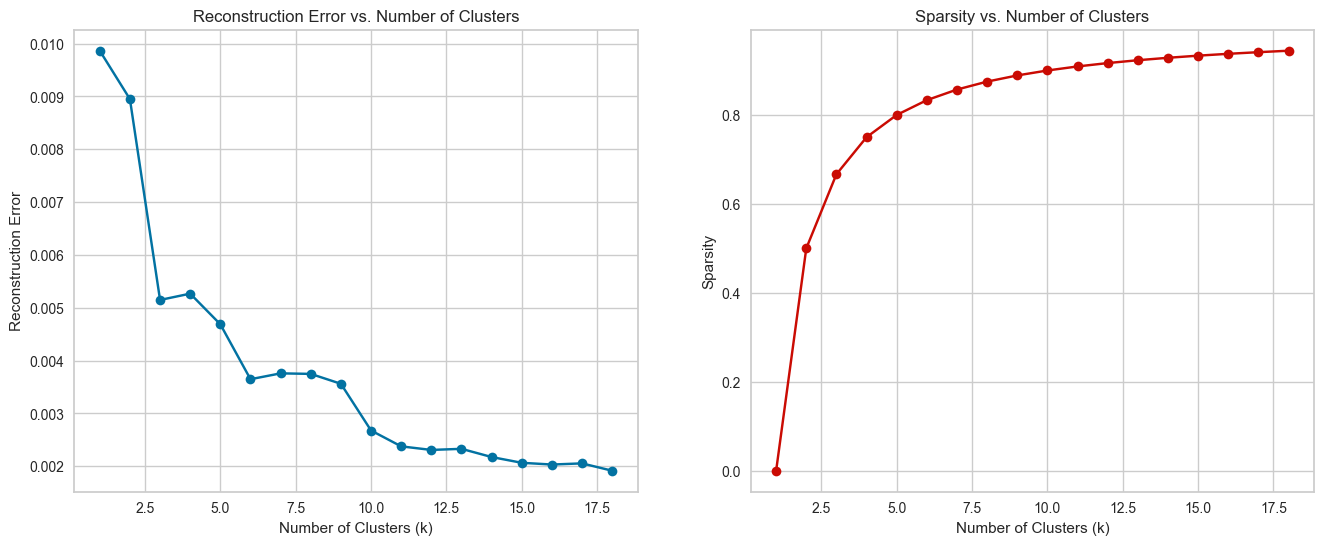

In [201]:
error_DL=[]
sparsity_DL=[]
for i in range(1, len(df.columns)+1):
    dict_learner = DictionaryLearning(n_components=i, random_state=36, fit_algorithm='lars', transform_algorithm='omp')
    X_transformed = dict_learner.fit_transform(df.values)
    X_hat = X_transformed@dict_learner.components_
    loss = np.mean(np.sum((X_hat-df.values)**2, axis=1)/np.sum(df.values**2, axis=1))
    error_DL.append(loss)
    sparsity_DL.append(np.mean(X_transformed==0))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(range(1, len(df.columns)+1), error_DL, 'bo-')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Reconstruction Error')
ax[0].set_title('Reconstruction Error vs. Number of Clusters')
ax[1].plot(range(1, len(df.columns)+1), sparsity_DL, 'ro-')
ax[1].set_ylabel('Sparsity')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_title('Sparsity vs. Number of Clusters')
plt.show()

### Clustering with Dimension Reduction

In [222]:
#pca
start = time.time()
pca = PCA(n_components=3, random_state=36)
end = time.time()
df_pca = pd.DataFrame(pca.fit_transform(df.values))
time_pca = end-start

#ICA
start = time.time()
ica = FastICA(n_components=4, random_state=36)
end = time.time()
df_ica = pd.DataFrame(ica.fit_transform(df.values))
time_ica = end-start

#RP
start = time.time()
rp = GaussianRandomProjection(n_components=8, random_state=36)
end = time.time()
df_rp = pd.DataFrame(rp.fit_transform(df.values))
time_rp = end-start

#DL
start = time.time()
dl = DictionaryLearning(n_components=6, random_state=36, fit_algorithm='lars', transform_algorithm='omp')
end = time.time()
df_dl = pd.DataFrame(dl.fit_transform(df.values))
time_dl = end-start

In [223]:
# plt.figure(figsize=(8, 6))
# plt.bar(['PCA', 'ICA', 'RP', 'DL'], [time_pca, time_ica, time_rp, time_dl])
# plt.ylabel('Time (s)')
# plt.title('Time to Fit Models')
# plt.show()

In [224]:
# Kmeans
score_list_pca = []
inertia_list_pca = []
time_list_pca = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= KMeans(k, random_state=36)
    model.fit(df_pca.values)
    inertia_list_pca.append(model.inertia_)
    score = silhouette_score(df_pca.values, model.labels_)
    score_list_pca.append(score)
    end = time.time()
    time_list_pca.append(end-start)


score_list_ica = []
inertia_list_ica = []
time_list_ica = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= KMeans(k, random_state=36)
    model.fit(df_ica.values)
    inertia_list_ica.append(model.inertia_)
    score = silhouette_score(df_ica.values, model.labels_)
    score_list_ica.append(score)
    end = time.time()
    time_list_ica.append(end-start)

score_list_rp = []
inertia_list_rp = []
time_list_rp = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= KMeans(k, random_state=36)
    model.fit(df_rp.values)
    inertia_list_rp.append(model.inertia_)
    score = silhouette_score(df_rp.values, model.labels_)
    score_list_rp.append(score)
    end = time.time()
    time_list_rp.append(end-start)

score_list_dl = []
inertia_list_dl = []
time_list_dl = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= KMeans(k, random_state=36)
    model.fit(df_dl.values)
    inertia_list_dl.append(model.inertia_)
    score = silhouette_score(df_dl.values, model.labels_)
    score_list_dl.append(score)
    end = time.time()
    time_list_dl.append(end-start)

score_list_orig = []
inertia_list_orig = []
time_list_orig = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= KMeans(k, random_state=36)
    model.fit(df.values)
    inertia_list_orig.append(model.inertia_)
    score = silhouette_score(df.values, model.labels_)
    score_list_orig.append(score)
    end = time.time()
    time_list_orig.append(end-start)

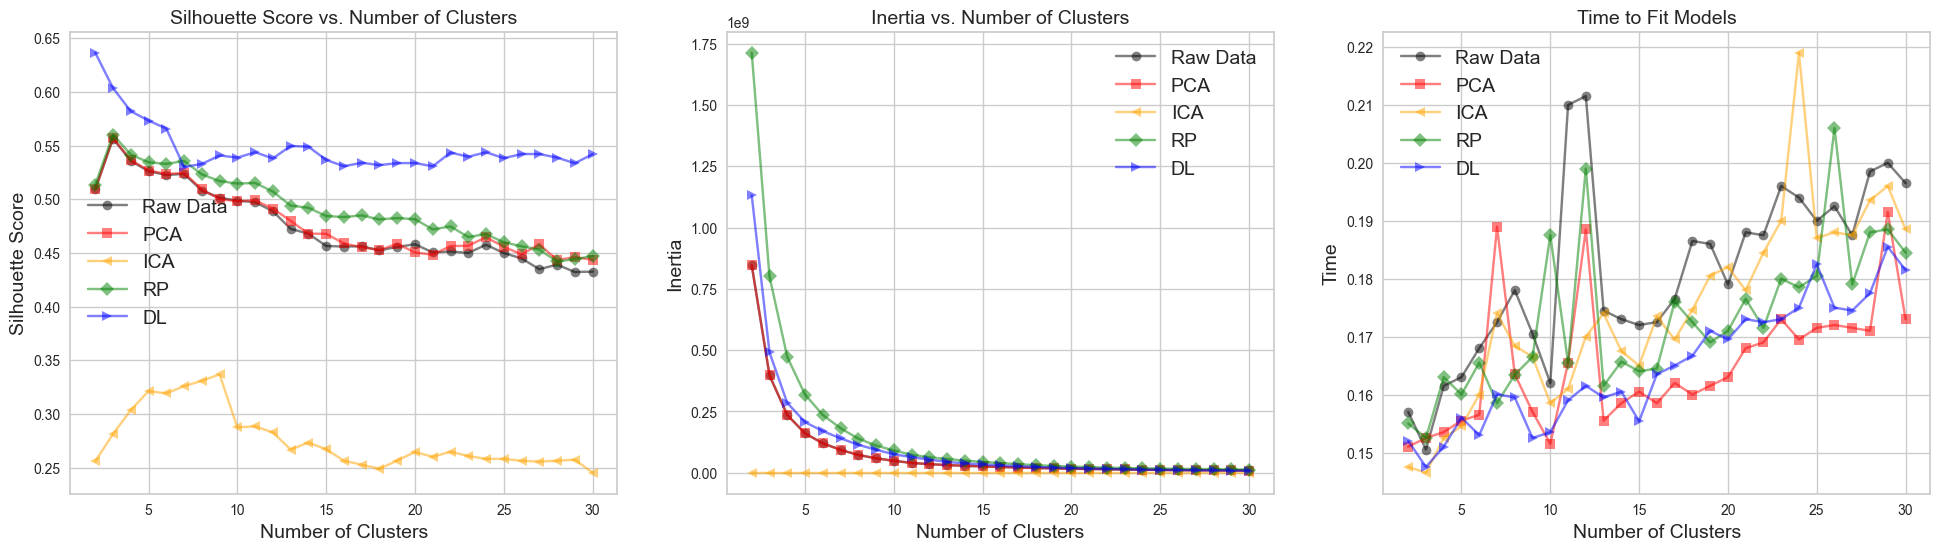

In [225]:
fig, ax = plt.subplots(1, 3,figsize=(24, 6))
ax[0].plot(range(2,31),score_list_orig, color='black', marker='o', alpha=0.5, label='Raw Data')
ax[0].plot(range(2,31),score_list_pca, color='red', marker='s', alpha=0.5, label='PCA')
ax[0].plot(range(2,31),score_list_ica, color='orange', marker='<', alpha=0.5, label='ICA')
ax[0].plot(range(2,31),score_list_rp, color='green', marker='D', alpha=0.5, label='RP')
ax[0].plot(range(2,31),score_list_dl, color='blue', marker='>', alpha=0.5, label='DL')
ax[0].set_xlabel('Number of Clusters', fontsize=14)
ax[0].set_ylabel('Silhouette Score', fontsize=14)
ax[0].set_title('Silhouette Score vs. Number of Clusters', fontsize=14)
ax[0].legend(loc='best', fontsize=14)
ax[1].plot(range(2,31),inertia_list_orig, color='black', marker='o', alpha=0.5, label='Raw Data')
ax[1].plot(range(2,31),inertia_list_pca, color='red', marker='s', alpha=0.5, label='PCA')
ax[1].plot(range(2,31),inertia_list_ica, color='orange', marker='<', alpha=0.5, label='ICA')
ax[1].plot(range(2,31),inertia_list_rp, color='green', marker='D', alpha=0.5, label='RP')
ax[1].plot(range(2,31),inertia_list_dl, color='blue', marker='>', alpha=0.5, label='DL')
ax[1].set_xlabel('Number of Clusters', fontsize=14)
ax[1].set_ylabel('Inertia', fontsize=14)
ax[1].set_title('Inertia vs. Number of Clusters', fontsize=14)
ax[1].legend(loc='best', fontsize=14)
ax[2].plot(range(2,31),time_list_orig, color='black', marker='o', alpha=0.5, label='Raw Data')
ax[2].plot(range(2,31),time_list_pca, color='red', marker='s', alpha=0.5, label='PCA')
ax[2].plot(range(2,31),time_list_ica, color='orange', marker='<', alpha=0.5, label='ICA')
ax[2].plot(range(2,31),time_list_rp, color='green', marker='D', alpha=0.5, label='RP')
ax[2].plot(range(2,31),time_list_dl, color='blue', marker='>', alpha=0.5, label='DL')
ax[2].set_xlabel('Number of Clusters', fontsize=14)
ax[2].set_ylabel('Time', fontsize=14)
ax[2].set_title('Time to Fit Models', fontsize=14)
ax[2].legend(loc='best', fontsize=14)
plt.show()

In [226]:
# K = [2, 3, 4, 5, 6]
# SV_ICD_plots(df_pca, K, KMeans)

In [227]:
# K = [2, 3, 4, 5, 6]
# SV_ICD_plots(df_ica, K, KMeans)

In [228]:
# GMM
score_list_pca = []
bic_pca = []
time_list_pca = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= GaussianMixture(k, random_state=36, n_init=9)
    model.fit(df_pca.values)
    score = silhouette_score(df_pca.values, model.predict(df_pca.values))
    score_list_pca.append(score)
    bic_pca.append(model.bic(df_pca.values))
    end = time.time()
    time_list_pca.append(end-start)


score_list_ica = []
bic_ica = []
time_list_ica = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= GaussianMixture(k, random_state=36, n_init=9)
    model.fit(df_ica.values)
    score = silhouette_score(df_ica.values, model.predict(df_ica.values))
    score_list_ica.append(score)
    bic_ica.append(model.bic(df_ica.values))
    end = time.time()
    time_list_ica.append(end-start)

score_list_rp = []
bic_rp = []
time_list_rp = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= GaussianMixture(k, random_state=36, n_init=9)
    model.fit(df_rp.values)
    score = silhouette_score(df_rp.values, model.predict(df_rp.values))
    score_list_rp.append(score)
    bic_rp.append(model.bic(df_rp.values))
    end = time.time()
    time_list_rp.append(end-start)

score_list_dl = []
bic_dl = []
time_list_dl = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= GaussianMixture(k, random_state=36, n_init=9)
    model.fit(df_dl.values)
    score = silhouette_score(df_dl.values, model.predict(df_dl.values))
    score_list_dl.append(score)
    bic_dl.append(model.bic(df_dl.values))
    end = time.time()
    time_list_dl.append(end-start)

score_list_orig = []
bic_orig = []
time_list_orig = []
K = range(2, 31)
for k in K:
    start = time.time()
    model= GaussianMixture(k, random_state=36, n_init=9)
    model.fit(df.values)
    score = silhouette_score(df.values, model.predict(df.values))
    score_list_orig.append(score)
    bic_orig.append(model.bic(df.values))
    end = time.time()
    time_list_orig.append(end-start)

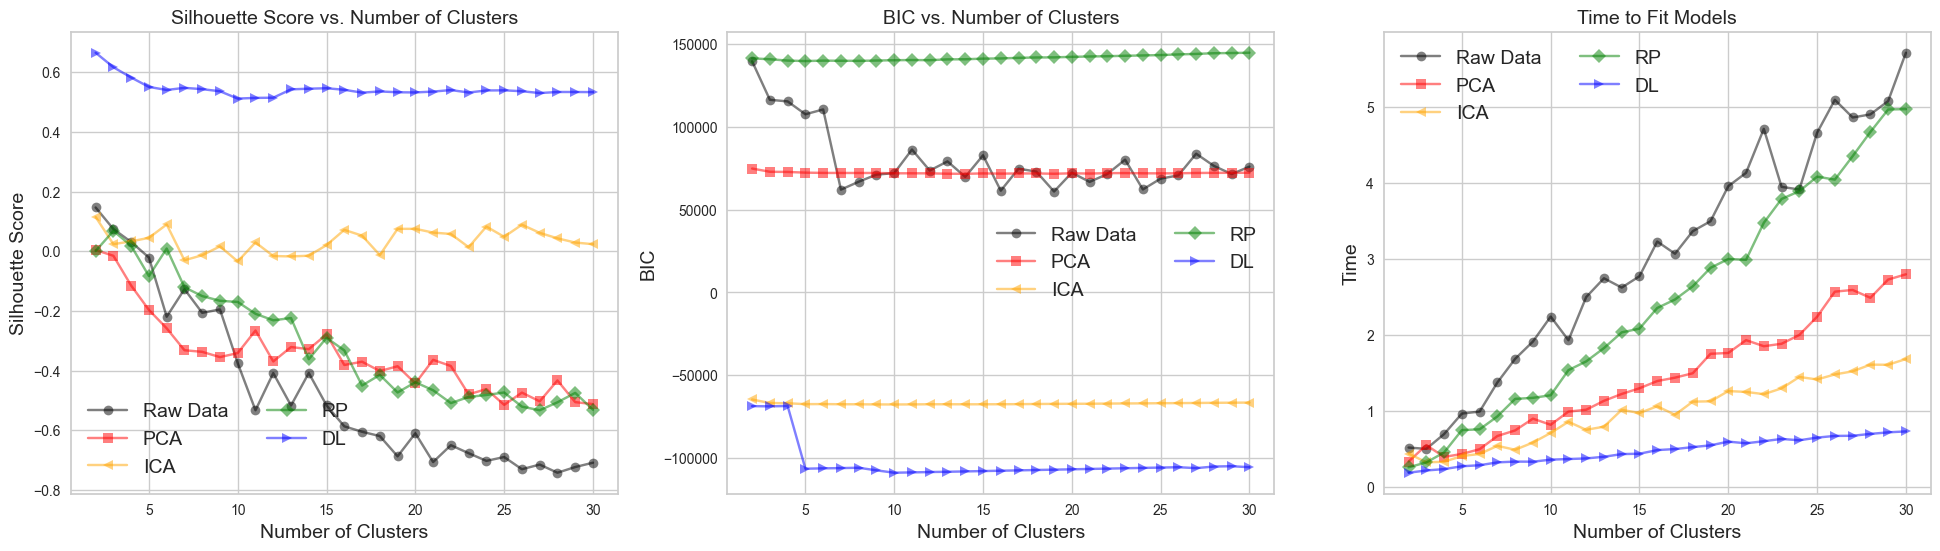

In [229]:
fig, ax = plt.subplots(1, 3,figsize=(24, 6))
ax[0].plot(range(2,31),score_list_orig, color='black', marker='o', alpha=0.5, label='Raw Data')
ax[0].plot(range(2,31),score_list_pca, color='red', marker='s', alpha=0.5, label='PCA')
ax[0].plot(range(2,31),score_list_ica, color='orange', marker='<', alpha=0.5, label='ICA')
ax[0].plot(range(2,31),score_list_rp, color='green', marker='D', alpha=0.5, label='RP')
ax[0].plot(range(2,31),score_list_dl, color='blue', marker='>', alpha=0.5, label='DL')
ax[0].set_xlabel('Number of Clusters', fontsize=14)
ax[0].set_ylabel('Silhouette Score', fontsize=14)
ax[0].set_title('Silhouette Score vs. Number of Clusters', fontsize=14)
ax[0].legend(loc='best', fontsize=14, ncol=2)
ax[1].plot(range(2,31),bic_orig, color='black', marker='o', alpha=0.5, label='Raw Data')
ax[1].plot(range(2,31),bic_pca, color='red', marker='s', alpha=0.5, label='PCA')
ax[1].plot(range(2,31),bic_ica, color='orange', marker='<', alpha=0.5, label='ICA')
ax[1].plot(range(2,31),bic_rp, color='green', marker='D', alpha=0.5, label='RP')
ax[1].plot(range(2,31),bic_dl, color='blue', marker='>', alpha=0.5, label='DL')
ax[1].set_xlabel('Number of Clusters', fontsize=14)
ax[1].set_ylabel('BIC', fontsize=14)
ax[1].set_title('BIC vs. Number of Clusters', fontsize=14)
ax[1].legend(loc='best', fontsize=14, ncol=2)
ax[2].plot(range(2,31),time_list_orig, color='black', marker='o', alpha=0.5, label='Raw Data')
ax[2].plot(range(2,31),time_list_pca, color='red', marker='s', alpha=0.5, label='PCA')
ax[2].plot(range(2,31),time_list_ica, color='orange', marker='<', alpha=0.5, label='ICA')
ax[2].plot(range(2,31),time_list_rp, color='green', marker='D', alpha=0.5, label='RP')
ax[2].plot(range(2,31),time_list_dl, color='blue', marker='>', alpha=0.5, label='DL')
ax[2].set_xlabel('Number of Clusters', fontsize=14)
ax[2].set_ylabel('Time', fontsize=14)
ax[2].set_title('Time to Fit Models', fontsize=14)
ax[2].legend(loc='best', fontsize=14, ncol=2)
plt.show()